Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:

1-Data Exploration and Understanding:

Dataset Overview:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the dataset
file_path = '/content/WHR-2024-5CS037.csv'
data = pd.read_csv(file_path)
# Displaying the first 10 rows
(data.head(10))

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
# Number of rows and columns
print(data.shape)

(143, 9)


In [ ]:
# List of columns and their data types
print(data.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


Basic Statistics:

In [ ]:
# Mean, median, and standard deviation of the 'score' column
mean = data['score'].mean()
median = data['score'].median()
std = data['score'].std()

mean, median, std

(5.52758041958042, 5.785, 1.1707165099442995)

In [ ]:
# Country with the highest and lowest happiness scores
highest_happiness = data.loc[data['score'].idxmax(), 'Country name']
lowest_happiness = data.loc[data['score'].idxmin(), 'Country name']

highest_happiness, lowest_happiness

('Finland', 'Afghanistan')

Missing Values:

In [ ]:
# Check for missing values
missing = data.isnull().sum()
print(missing)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


Filtering and Sorting:

In [ ]:
# Filter countries with Score > 7.5
highscore_countries = data[data['score'] > 7.5]
(highscore_countries)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [ ]:
# Sort by Log GDP per capita in descending order
top_gdp = highscore_countries.sort_values(by='Log GDP per capita', ascending=False).head(10)
top_gdp

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


Adding New Columns:

In [ ]:
# Add a new column 'Happiness Category'
conditions = [
    (data['score'] < 4),
    (data['score'] >= 4) & (data['score'] <= 6),
    (data['score'] > 6)
]
categories = ['Low', 'Medium', 'High']

# Use np.select directly instead of pd.np.select
data['Happiness Category'] = np.select(conditions, categories)
data[['Country name', 'score', 'Happiness Category']].head(10)


,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High
5,Netherlands,7.319,High
6,Norway,7.302,High
7,Luxembourg,7.122,High
8,Switzerland,7.060,High
9,Australia,7.057,High


2. Data Visualizations:

Bar Plot: Plot the top 10 happiest countries by Score using a bar chart

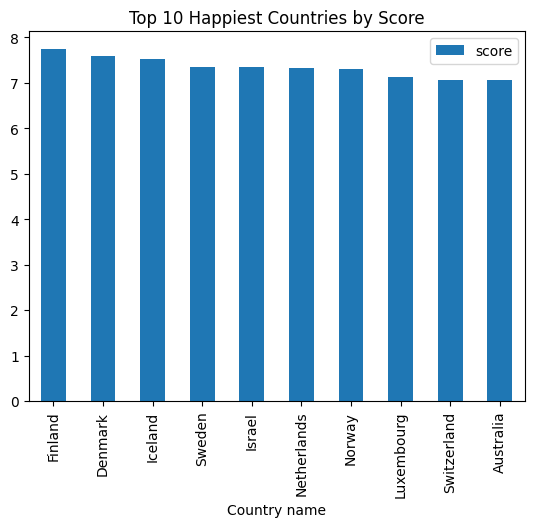

In [ ]:
# top 10 happiest countries by Score using a bar chart
top_10_happiest = data.sort_values(by='score', ascending=False).head(10)
top_10_happiest.plot(x='Country name', y='score', kind='bar', title='Top 10 Happiest Countries by Score')
plt.show()

Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

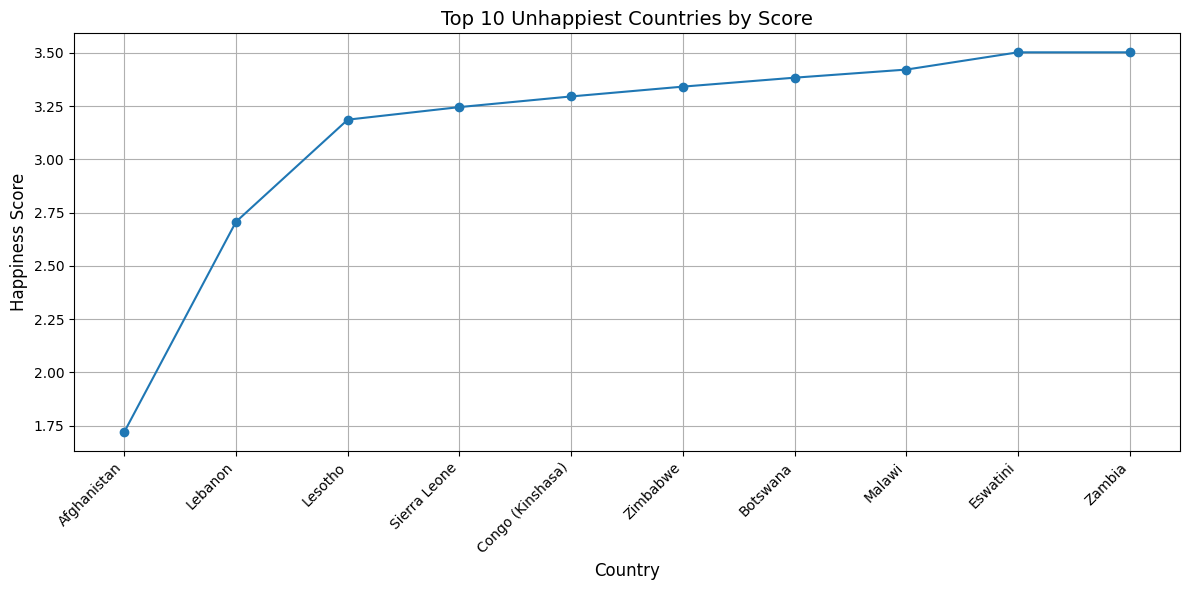

In [ ]:
# Sorting data and get the top 10 unhappiest countries
top_10_unhappiest = data.sort_values(by='score', ascending=True).head(10)

plt.figure(figsize=(12, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o')
plt.title('Top 10 Unhappiest Countries by Score', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

Plot a histogram for the Score column to show its distribution and also interpret.

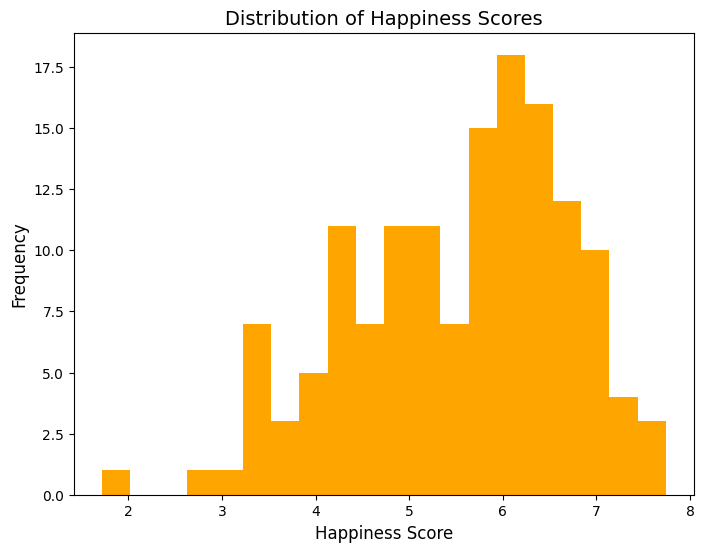

In [ ]:
# Plotting the histogram for the 'score' column
plt.figure(figsize=(8, 6))
plt.hist(data['score'], bins=20, color='orange')
plt.title('Distribution of Happiness Scores', fontsize=14)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

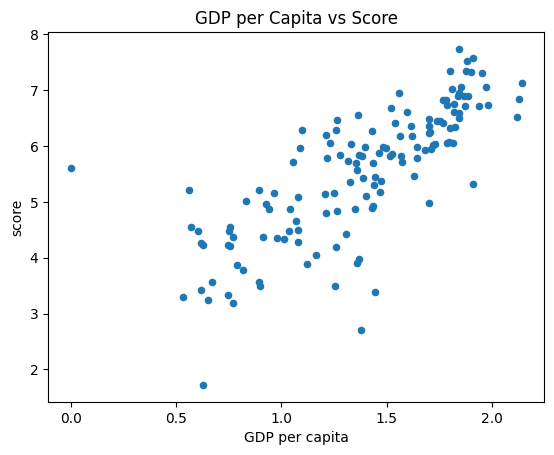

In [ ]:
#Scatter Plotting a scatter plot between GDP per Capita and Score to visualize their relationship.
data.plot(x='Log GDP per capita',xlabel="GDP per capita", y='score', kind='scatter', title='GDP per Capita vs Score')
plt.show()

Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [ ]:
# Task 1: Preparing  South Asia Dataset
#A. Defining the South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [ ]:
#B. Filtering the dataset to include only these countries.
south_asia_df = data[data['Country name'].isin(south_asian_countries)]

Save the filtered dataframe as separate CSV files for future use.

In [ ]:
#C. Saving the filtered dataset as a separate CSV file.
south_asia_df.to_csv('/content/south_asia_dataset.csv', index=False)

Displaying the South Asia DataFrame

In [ ]:
# Displaying the South Asia DataFrame
south_asia_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


Task - 2 - Composite Score Ranking:

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy

In [48]:
# Create Composite Score column
south_asia_df['Composite Score'] = (
    0.4 * south_asia_df['Log GDP per capita'] +
    0.3 * south_asia_df['Social support'] +
    0.3 * south_asia_df['Healthy life expectancy']
)
south_asia_df

<ipython-input-48-99a3687f220e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


Rank the South Asian countries based on the Composite Score in descending order.

In [ ]:
# Displaying the south Asian ranked countries with their composite scoresin desceinding order
SA_ranked_countries = south_asia_df[['Country name', 'Composite Score']].reset_index(drop=True)
SA_ranked_countries

,Country name,Composite Score
0,Nepal,0.8159
1,Pakistan,0.7039
2,India,0.7874
3,Sri Lanka,1.0739
4,Bangladesh,0.6774
5,Afghanistan,0.3238


Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

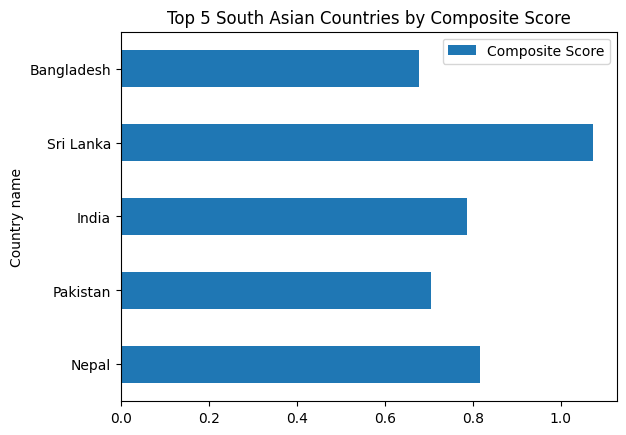

In [ ]:
#Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
top_5_Countries = SA_ranked_countries.head(5)
top_5_Countries.plot(x='Country name', y='Composite Score', kind='barh', title='Top 5 South Asian Countries by Composite Score')
plt.show()

Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

<ipython-input-49-eed510433e89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Rank'] = south_asia_df['Composite Score'].rank(ascending=False)
<ipython-input-49-eed510433e89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Original Rank'] = south_asia_df['score'].rank(ascending=False)


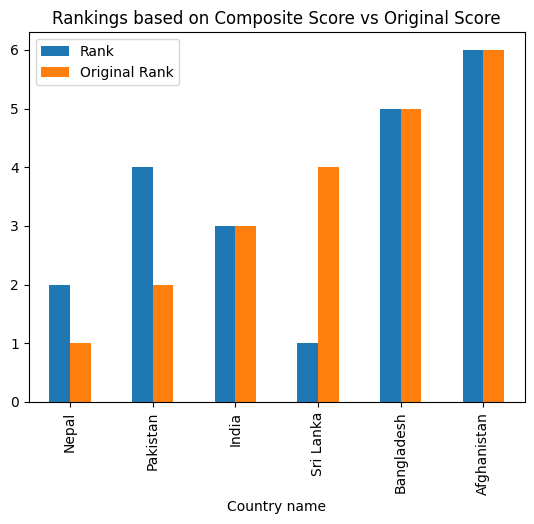

In [49]:
#Bar graph to compare Composite Score vs Original Score
south_asia_df['Rank'] = south_asia_df['Composite Score'].rank(ascending=False)
south_asia_df['Original Rank'] = south_asia_df['score'].rank(ascending=False)
south_asia_df.plot(x='Country name', y=['Rank', 'Original Rank'], kind='bar', title='Rankings based on Composite Score vs Original Score')
plt.show()

Task - 3 - Outlier Detection:

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [ ]:
# Outlier detection using 1.5 * IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Detect outliers for 'score' and 'Log GDP per capita'
south_asia_df['Outlier'] = detect_outliers(south_asia_df['score']) | detect_outliers(south_asia_df['Log GDP per capita'])
outliers = south_asia_df[south_asia_df['Outlier']]
outliers[['Country name', 'score', 'Log GDP per capita']]


<ipython-input-23-4fb15a2c6ddb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Outlier'] = detect_outliers(south_asia_df['score']) | detect_outliers(south_asia_df['Log GDP per capita'])


,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628


Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

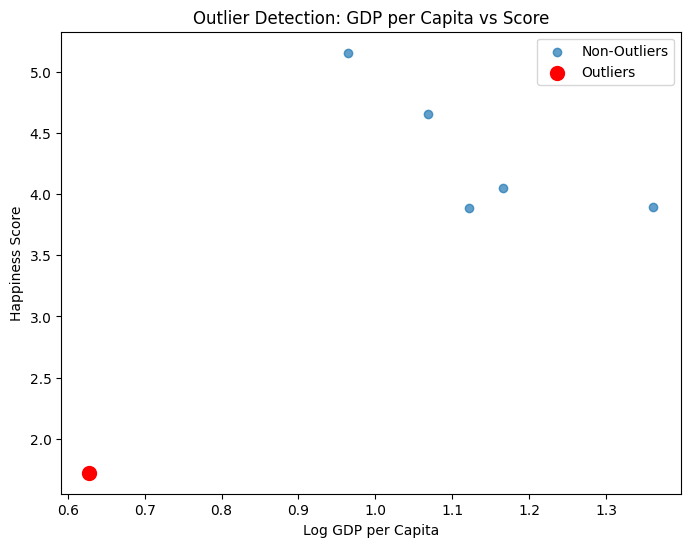

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='Non-Outliers', alpha=0.7)
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers', s=100)
plt.title('Outlier Detection: GDP per Capita vs Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()


Exploring Trends Across Metrics:

Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [50]:
# Calculating the Pearson correlation with 'score'
correlations = {
    'Freedom to Make Life Choices': south_asia_df['Freedom to make life choices'].corr(south_asia_df['score']),
    'Generosity': south_asia_df['Generosity'].corr(south_asia_df['score'])
}
print(correlations)

{'Freedom to Make Life Choices': 0.8005185224163315, 'Generosity': 0.874512371253192}


Create scatter plots with trendlines for these metrics against the Score.

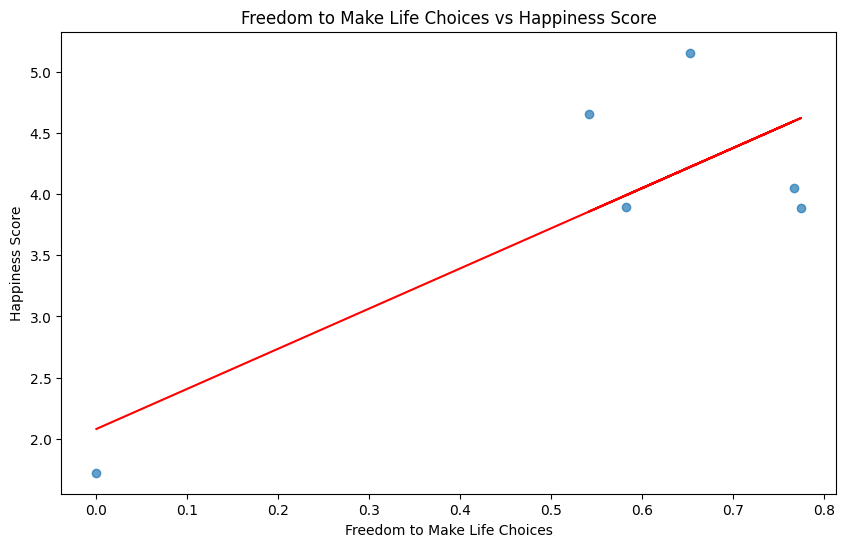

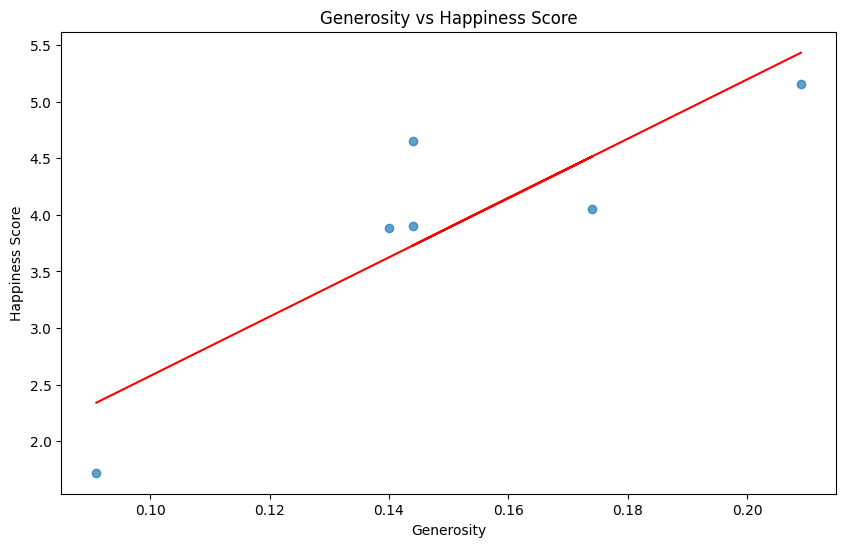

In [ ]:
x1 = south_asia_df['Freedom to make life choices']
y1 = south_asia_df['score']
m1, b1 = np.polyfit(x1, y1, 1)  # Calculate the trendline

plt.figure(figsize=(10, 6))
plt.scatter(x1, y1, alpha=0.7)
plt.plot(x1, m1*x1 + b1, color='red')  # Trendline
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

# Scatter plot for 'Generosity' vs 'Score'
x2 = south_asia_df['Generosity']
y2 = south_asia_df['score']
m2, b2 = np.polyfit(x2, y2, 1)  # Calculate the trendline

plt.figure(figsize=(10, 6))
plt.scatter(x2, y2, alpha=0.7)
plt.plot(x2, m2*x2 + b2, color='red')  # Trendline
plt.title('Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

Gap Analysis:

Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [ ]:
# Add the 'GDP-Score Gap' column
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Display the updated DataFrame with the new column
south_asia_df[['Country name', 'GDP-Score Gap']].head()

<ipython-input-27-901017c3d804>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']


,Country name,GDP-Score Gap
92,Nepal,-4.193
107,Pakistan,-3.588
125,India,-2.888
127,Sri Lanka,-2.537
128,Bangladesh,-2.764


Rank the South Asian countries by this gap in both ascending and descending order.

In [ ]:
# Rank the countries by GDP-Score Gap in ascending and descending order
ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap').head(3)  # Largest negative gaps
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False).head(3)  # Largest positive gaps

ascending_gap[['Country name', 'GDP-Score Gap']], descending_gap[['Country name', 'GDP-Score Gap']]

(    Country name  GDP-Score Gap
 92         Nepal         -4.193
 107     Pakistan         -3.588
 125        India         -2.888,
     Country name  GDP-Score Gap
 142  Afghanistan         -1.093
 127    Sri Lanka         -2.537
 128   Bangladesh         -2.764)

Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

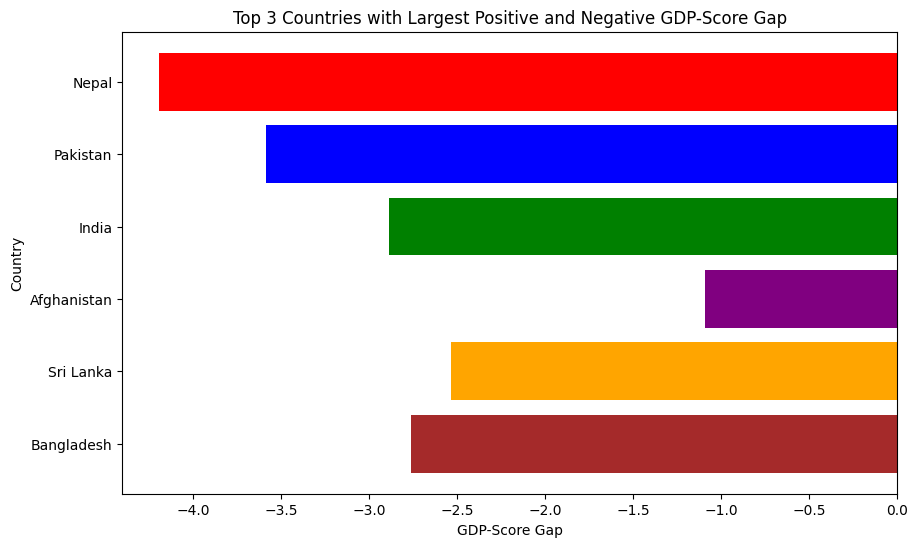

In [ ]:
# Bar chart for Top 3 positive and negative GDP-Score Gap
gap_data = pd.concat([ascending_gap[['Country name', 'GDP-Score Gap']], descending_gap[['Country name', 'GDP-Score Gap']]])

plt.figure(figsize=(10, 6))
plt.barh(gap_data['Country name'], gap_data['GDP-Score Gap'], color=['red', 'blue', 'green', 'purple', 'orange', 'brown'])
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()


Comparative Analysis:

Setup Task - Preparing the Middle Eastern Dataset:

In [ ]:
# Define the list of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
# Filter the dataset for Middle Eastern countries
middle_east_df = data[data['Country name'].isin(middle_east_countries)]

# Save the filtered dataframe to a CSV file
# Updated the file path for the output file
middle_east_df.to_csv('/content/middle_east_dataset.csv', index=False)

# Display the Middle Eastern DataFrame
middle_east_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


Descriptive Statistics:

Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

In [57]:
# Calculate mean and standard deviation of 'score' for South Asia and Middle East
# Filter South Asia dataset
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]
south_asia_df = data[data['Country name'].isin(south_asia_countries)]

# Mean and standard deviation for South Asia
south_asia_mean = south_asia_df['score'].mean() # Changed south_asia_data to south_asia_df
south_asia_std = south_asia_df['score'].std()  # Changed south_asia_data to south_asia_df
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

print("\nDescriptive Statistics for Happiness Score:")
print(f"South Asia - Mean: {south_asia_mean:.2f}, Std Dev: {south_asia_std:.2f}")
print(f"Middle East - Mean: {middle_east_mean:.2f}, Std Dev: {middle_east_std:.2f}")

# Compare averages
if south_asia_mean > middle_east_mean:
    print("South Asia has higher average happiness scores.")
else:
    print("Middle East has higher average happiness scores.")


Descriptive Statistics for Happiness Score:
South Asia - Mean: 3.90, Std Dev: 1.18
Middle East - Mean: 5.41, Std Dev: 1.57
Middle East has higher average happiness scores.


Top and Bottom Performers:

Identify the top 3 and bottom 3 countries in each region based on the score.

In [58]:
# Identify top 3 and bottom 3 countries for South Asia
top_3_south_asia = south_asia_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_south_asia = south_asia_df.nsmallest(3, 'score')[['Country name', 'score']]

# Identify top 3 and bottom 3 countries for Middle East
top_3_middle_east = middle_east_df.nlargest(3, 'score')[['Country name', 'score']]
bottom_3_middle_east = middle_east_df.nsmallest(3, 'score')[['Country name', 'score']]

(top_3_south_asia, bottom_3_south_asia), (top_3_middle_east, bottom_3_middle_east)


((    Country name  score
  92         Nepal  5.158
  107     Pakistan  4.657
  125        India  4.054,
      Country name  score
  142  Afghanistan  1.721
  128   Bangladesh  3.886
  127    Sri Lanka  3.898),
 (            Country name  score
  4                 Israel  7.341
  12                Kuwait  6.951
  21  United Arab Emirates  6.733,
      Country name  score
  141      Lebanon  2.707
  132        Yemen  3.561
  124       Jordan  4.186))

In [ ]:
# ipython-input-81-b693683cfa62
print("\nTop and Bottom Performers:")
print("South Asia - Top 3:")
print(top_3_south_asia[['Country name', 'score']]) # Changed 'top_south_asia' to 'top_3_south_asia'
print("South Asia - Bottom 3:")
print(bottom_3_south_asia[['Country name', 'score']]) # Changed 'bottom_south_asia' to 'bottom_3_south_asia'

print("Middle East - Top 3:")
print(top_3_middle_east[['Country name', 'score']]) # Changed 'top_middle_east' to 'top_3_middle_east'
print("Middle East - Bottom 3:")
print(bottom_3_middle_east[['Country name', 'score']]) # Changed 'bottom_middle_east' to 'bottom_3_middle_east'


Top and Bottom Performers:
South Asia - Top 3:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
South Asia - Bottom 3:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898
Middle East - Top 3:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733
Middle East - Bottom 3:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


Plot bar charts comparing these charts.

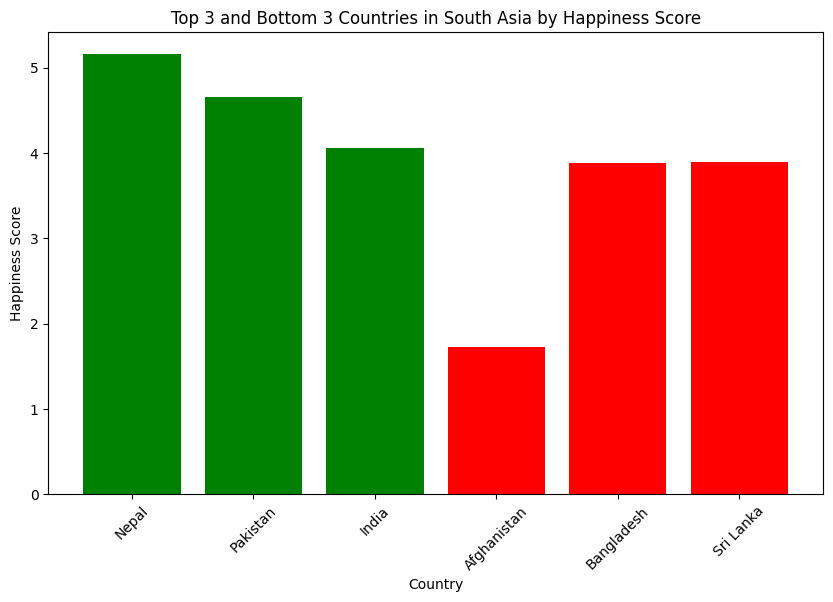

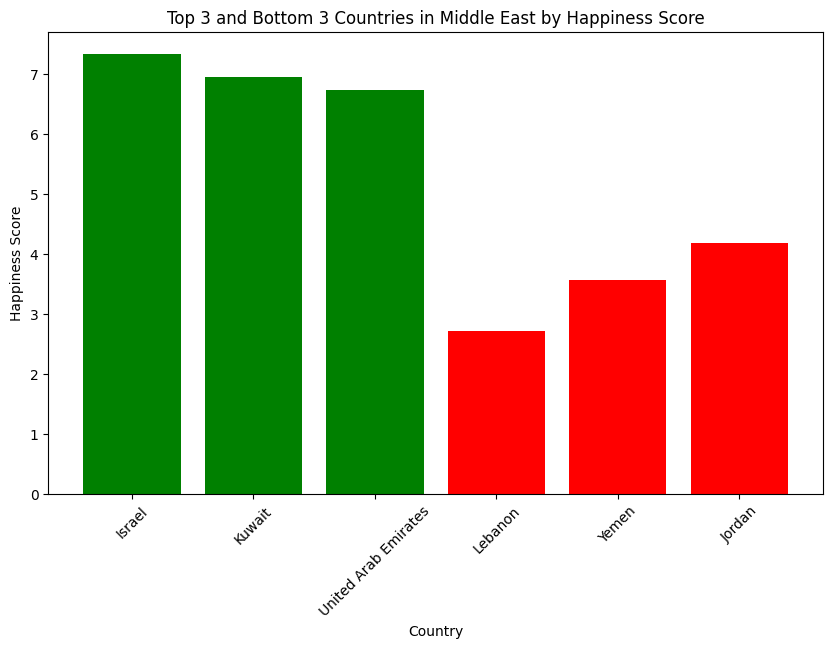

In [ ]:
# Prepare data for plotting
# South Asia
south_asia_countries = list(top_3_south_asia['Country name']) + list(bottom_3_south_asia['Country name'])
south_asia_scores = list(top_3_south_asia['score']) + list(bottom_3_south_asia['score'])

# Middle East
middle_east_countries = list(top_3_middle_east['Country name']) + list(bottom_3_middle_east['Country name'])
middle_east_scores = list(top_3_middle_east['score']) + list(bottom_3_middle_east['score'])

# Plot bar chart for South Asia
plt.figure(figsize=(10, 6))
plt.bar(south_asia_countries, south_asia_scores, color=['green', 'green', 'green', 'red', 'red', 'red'])
plt.title('Top 3 and Bottom 3 Countries in South Asia by Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

# Plot bar chart for Middle East
plt.figure(figsize=(10, 6))
plt.bar(middle_east_countries, middle_east_scores, color=['green', 'green', 'green', 'red', 'red', 'red'])
plt.title('Top 3 and Bottom 3 Countries in Middle East by Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()


Metric Comparisons:

Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

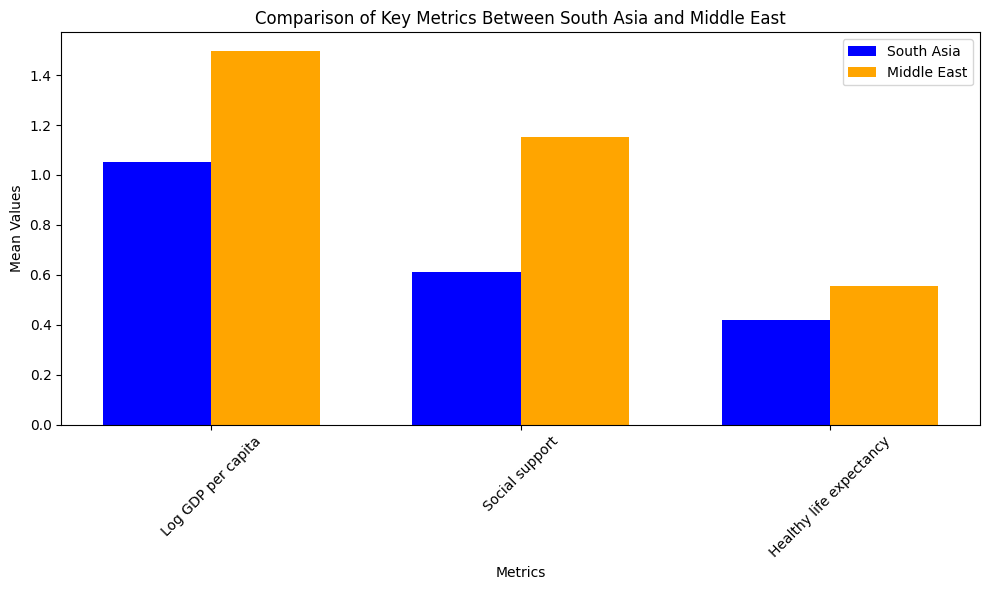

In [ ]:
# Calculate mean values for each metric for South Asia and Middle East
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_means = south_asia_df[metrics].mean()
middle_east_means = middle_east_df[metrics].mean()

# Prepare data for grouped bar chart
x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, south_asia_means, width, label='South Asia', color='blue')
plt.bar(x + width/2, middle_east_means, width, label='Middle East', color='orange')

# Customize the chart
plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.xticks(x, metrics, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Which metrics show the largest disparity between the two regions?

In [ ]:
# Calculate the absolute differences in mean values for each metric
disparities = abs(south_asia_means - middle_east_means)

# Find the metric with the largest disparity
largest_disparity_metric = disparities.idxmax()
largest_disparity_value = disparities.max()

disparities, (largest_disparity_metric, largest_disparity_value)

(Log GDP per capita         0.444500
 Social support             0.540944
 Healthy life expectancy    0.133778
 dtype: float64,
 ('Social support', 0.5409444444444443))

Happiness Disparity:

Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

In [ ]:
# Compute range and coefficient of variation
sa_range = south_asia_df['score'].max() - south_asia_df['score'].min()  # Changed south_asia_data to south_asia_df
me_range = middle_east_df['score'].max() - middle_east_df['score'].min()  # Changed middle_east_data to middle_east_df

sa_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()  # Changed south_asia_data to south_asia_df
me_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()  # Changed middle_east_data to middle_east_df

print("\nHappiness Disparity:")
print(f"South Asia - Range: {sa_range:.2f}, Coefficient of Variation: {sa_cv:.2f}")
print(f"Middle East - Range: {me_range:.2f}, Coefficient of Variation: {me_cv:.2f}")

if sa_cv > me_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")


Happiness Disparity:
South Asia - Range: 3.44, Coefficient of Variation: 0.30
Middle East - Range: 4.63, Coefficient of Variation: 0.29
South Asia has greater variability in happiness.


Correlation Analysis:

In [ ]:
sa_corr = south_asia_df[['score', 'Freedom to make life choices', 'Generosity']].corr() # Changed south_asia_data to south_asia_df
me_corr = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr() # Changed middle_east_data to middle_east_df

print("\nCorrelation Analysis (South Asia):")
print(sa_corr)
print("\nCorrelation Analysis (Middle East):")
print(me_corr)


Correlation Analysis (South Asia):
                                 score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  

Correlation Analysis (Middle East):
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


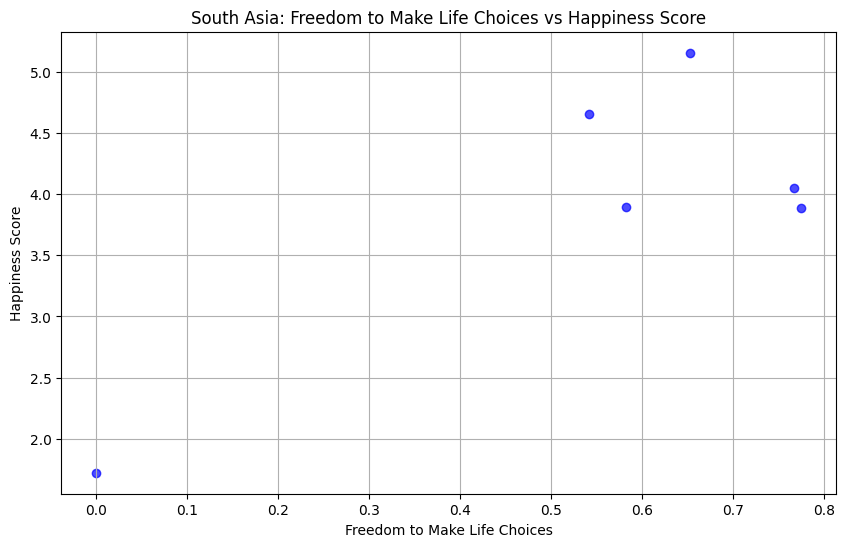

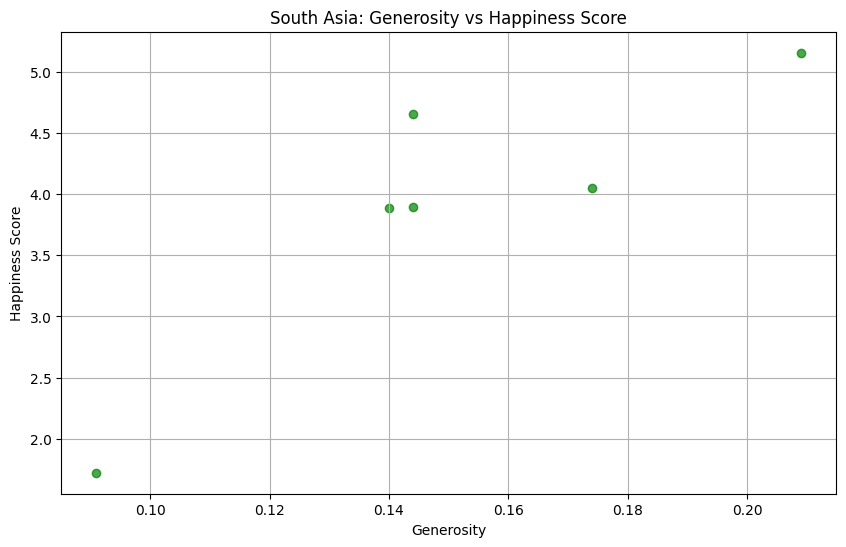

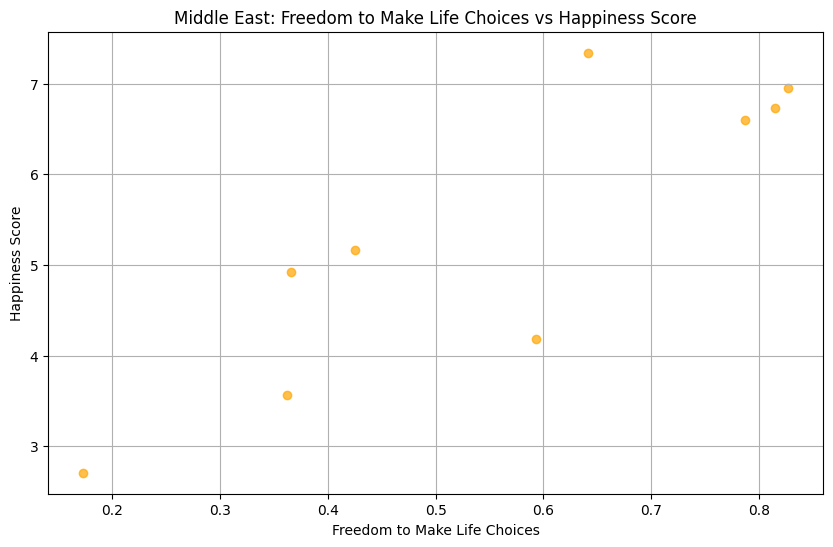

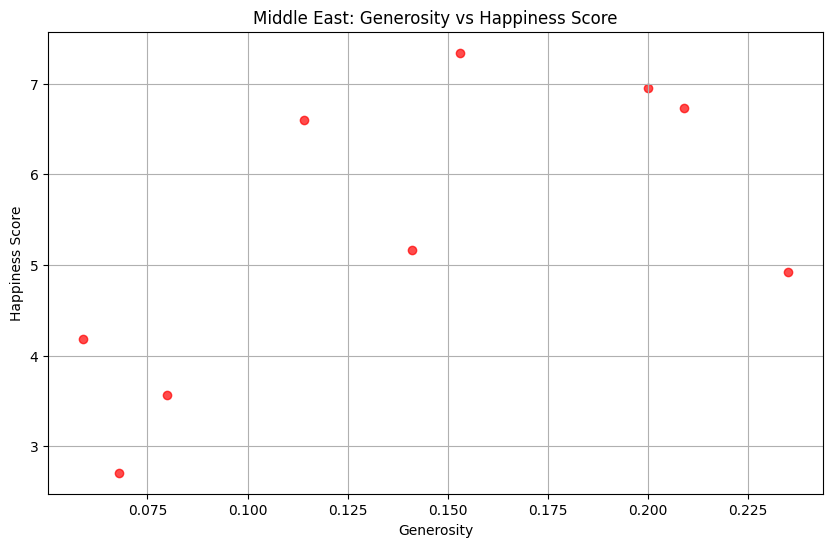

In [ ]:
# Scatter plot for 'Freedom to Make Life Choices' vs 'Score' in South Asia
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Freedom to make life choices'], south_asia_df['score'], alpha=0.7, color='blue')
plt.title('South Asia: Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

# Scatter plot for 'Generosity' vs 'Score' in South Asia
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Generosity'], south_asia_df['score'], alpha=0.7, color='green')
plt.title('South Asia: Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

# Scatter plot for 'Freedom to Make Life Choices' vs 'Score' in Middle East
plt.figure(figsize=(10, 6))
plt.scatter(middle_east_df['Freedom to make life choices'], middle_east_df['score'], alpha=0.7, color='orange')
plt.title('Middle East: Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

# Scatter plot for 'Generosity' vs 'Score' in Middle East
plt.figure(figsize=(10, 6))
plt.scatter(middle_east_df['Generosity'], middle_east_df['score'], alpha=0.7, color='red')
plt.title('Middle East: Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()


Outlier Detection:

Identify outlier countries in both regions based on Score and GDP per Capita.

In [ ]:
# Function to identify outliers using the 1.5 * IQR rule
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify outliers for South Asia
south_asia_outliers_score = identify_outliers(south_asia_df, 'score')
south_asia_outliers_gdp = identify_outliers(south_asia_df, 'Log GDP per capita')

# Identify outliers for Middle East
middle_east_outliers_score = identify_outliers(middle_east_df, 'score')
middle_east_outliers_gdp = identify_outliers(middle_east_df, 'Log GDP per capita')

# Display results
print("South Asia Outliers:")
print("Score Outliers:")
print(south_asia_outliers_score[['Country name', 'score']])
print("\nGDP Per Capita Outliers:")
print(south_asia_outliers_gdp[['Country name', 'Log GDP per capita']])

print("\nMiddle East Outliers:")
print("Score Outliers:")
print(middle_east_outliers_score[['Country name', 'score']])
print("\nGDP Per Capita Outliers:")
print(middle_east_outliers_gdp[['Country name', 'Log GDP per capita']])


South Asia Outliers:
Score Outliers:
    Country name  score
142  Afghanistan  1.721

GDP Per Capita Outliers:
    Country name  Log GDP per capita
142  Afghanistan               0.628

Middle East Outliers:
Score Outliers:
Empty DataFrame
Columns: [Country name, score]
Index: []

GDP Per Capita Outliers:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


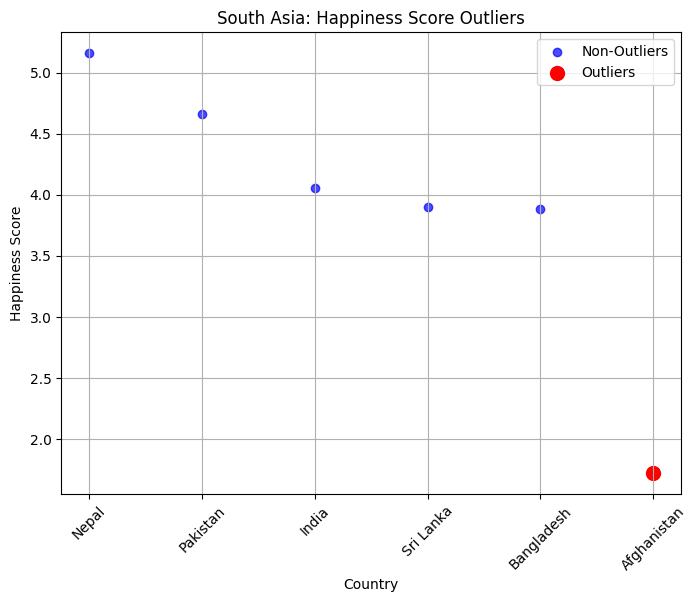

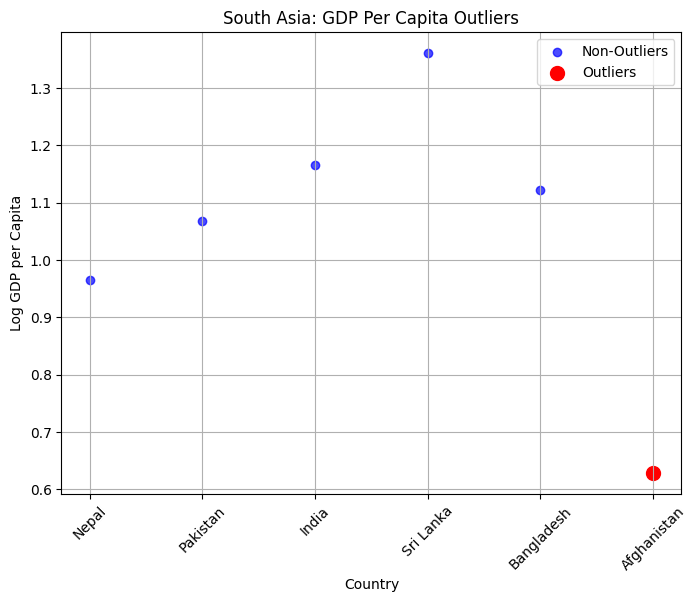

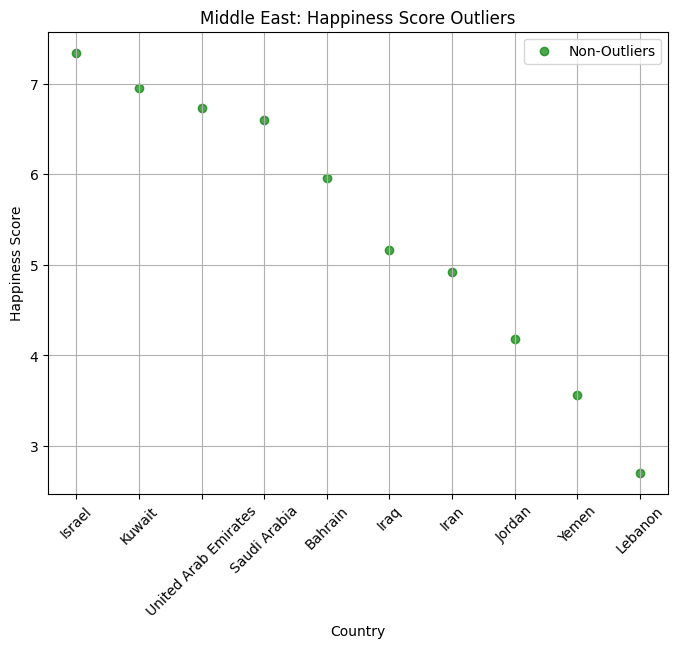

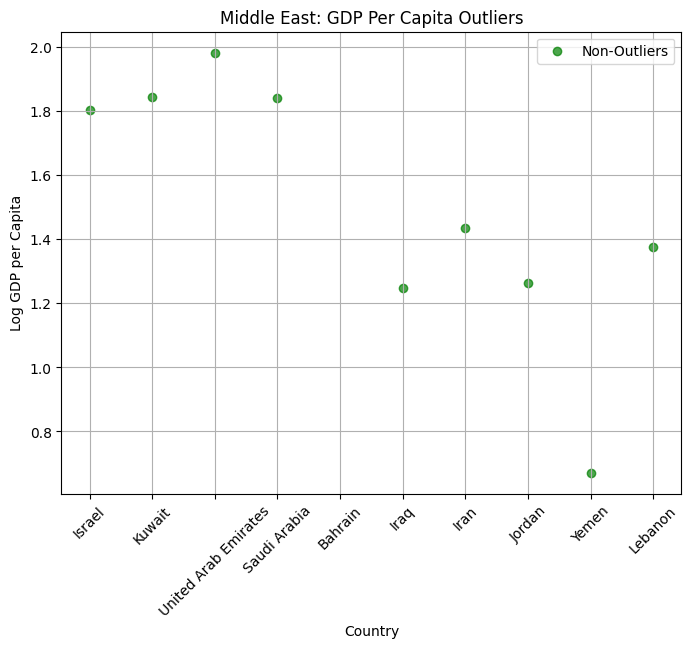

In [ ]:
# South Asia: Score Outliers
plt.figure(figsize=(8, 6))
plt.scatter(south_asia_df['Country name'], south_asia_df['score'], color='blue', label='Non-Outliers', alpha=0.7)
if not south_asia_outliers_score.empty:
    plt.scatter(south_asia_outliers_score['Country name'], south_asia_outliers_score['score'],
                color='red', label='Outliers', s=100)
plt.title('South Asia: Happiness Score Outliers')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# South Asia: GDP Per Capita Outliers
plt.figure(figsize=(8, 6))
plt.scatter(south_asia_df['Country name'], south_asia_df['Log GDP per capita'], color='blue', label='Non-Outliers', alpha=0.7)
if not south_asia_outliers_gdp.empty:
    plt.scatter(south_asia_outliers_gdp['Country name'], south_asia_outliers_gdp['Log GDP per capita'],
                color='red', label='Outliers', s=100)
plt.title('South Asia: GDP Per Capita Outliers')
plt.xlabel('Country')
plt.ylabel('Log GDP per Capita')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Middle East: Score Outliers
plt.figure(figsize=(8, 6))
plt.scatter(middle_east_df['Country name'], middle_east_df['score'], color='green', label='Non-Outliers', alpha=0.7)
if not middle_east_outliers_score.empty:
    plt.scatter(middle_east_outliers_score['Country name'], middle_east_outliers_score['score'],
                color='red', label='Outliers', s=100)
plt.title('Middle East: Happiness Score Outliers')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Middle East: GDP Per Capita Outliers
plt.figure(figsize=(8, 6))
plt.scatter(middle_east_df['Country name'], middle_east_df['Log GDP per capita'], color='green', label='Non-Outliers', alpha=0.7)
if not middle_east_outliers_gdp.empty:
    plt.scatter(middle_east_outliers_gdp['Country name'], middle_east_outliers_gdp['Log GDP per capita'],
                color='red', label='Outliers', s=100)
plt.title('Middle East: GDP Per Capita Outliers')
plt.xlabel('Country')
plt.ylabel('Log GDP per Capita')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Visualization:

Create boxplots comparing the distribution of Score between South Asia and the Middle East.

<ipython-input-42-93dc91b3f6ab>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='score', data=combined_data, palette='Set2')


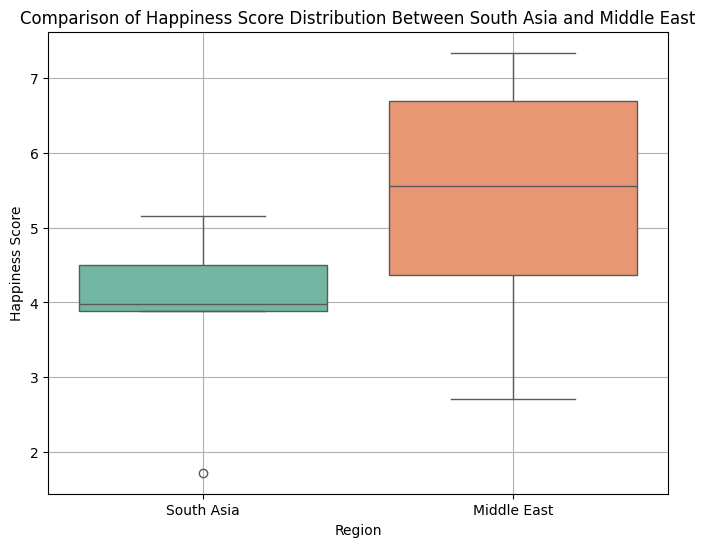

In [ ]:
# Combine data from both regions
combined_data = south_asia_df[['Country name', 'score']].copy()
combined_data['Region'] = 'South Asia'

middle_east_data = middle_east_df[['Country name', 'score']].copy()
middle_east_data['Region'] = 'Middle East'

combined_data = pd.concat([combined_data, middle_east_data])

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score', data=combined_data, palette='Set2')
plt.title('Comparison of Happiness Score Distribution Between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()